In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import nltk.classify.util
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.classify import NaiveBayesClassifier
import re
import string
import nltk
%matplotlib inline

In [4]:
add = "C:/Users/Kanimozhi/OneDrive/Desktop/Data Analytics/Dataset/1429_1.csv"

reviews = pd.read_csv(add,low_memory=False)
reviews.columns = ['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer','date', 'dateAdded', 'dateSeen',
       'didPurchase', 'doRecommend', 'id','numHelpful', 'rating', 'sourceURLs','text', 'title', 'userCity',
       'userProvince', 'username']

In [5]:
reviews.nunique()

id                 42
name               48
asins              41
brand               6
categories         41
keys               42
manufacturer        2
date             1078
dateAdded        1941
dateSeen         3911
didPurchase         1
doRecommend         2
id                  1
numHelpful         97
rating              5
sourceURLs      11929
text            34659
title           19767
userCity            0
userProvince        0
username        26789
dtype: int64

In [6]:
reviews.isnull().sum()

id                  0
name             6760
asins               2
brand               0
categories          0
keys                0
manufacturer        0
date               39
dateAdded       10621
dateSeen            0
didPurchase     34659
doRecommend       594
id              34659
numHelpful        529
rating             33
sourceURLs          0
text                1
title               5
userCity        34660
userProvince    34660
username            2
dtype: int64

In [7]:
reviews.drop(labels=['didPurchase','id','userCity','userProvince'],axis=1,inplace=True)

In [8]:
reviews.isnull().sum()

name             6760
asins               2
brand               0
categories          0
keys                0
manufacturer        0
date               39
dateAdded       10621
dateSeen            0
doRecommend       594
numHelpful        529
rating             33
sourceURLs          0
text                1
title               5
username            2
dtype: int64

In [9]:
permanent = reviews[['rating' , 'text' , 'title' , 'username']]
print(permanent.isnull().sum()) #Checking for null values
permanent.head()

rating      33
text         1
title        5
username     2
dtype: int64


,rating,text,title,username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [10]:
check =  permanent[permanent["rating"].isnull()]
check.head()

,rating,text,title,username
2886,NaN,The Kindle is my first e-ink reader. I own an ...,"Worth the money. Not perfect, but very very go...",Jeffrey Stanley
2887,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen
2888,NaN,UPDATE NOVEMBER 2011:My review is now over a y...,Kindle vs. Nook (updated),Ron Cronovich
2889,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen
2890,NaN,I woke up to a nice surprise this morning: a n...,"Not the perfect do-it-all device, but very clo...",C. Tipton


In [11]:
senti= permanent[permanent["rating"].notnull()]
permanent.head()

,rating,text,title,username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [12]:
senti["senti"] = senti["rating"]>=4
senti["senti"] = senti["senti"].replace([True , False] , ["pos" , "neg"])

C:\Users\KANIMO~1\AppData\Local\Temp/ipykernel_18688/962468938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti["senti"] = senti["rating"]>=4
C:\Users\KANIMO~1\AppData\Local\Temp/ipykernel_18688/962468938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti["senti"] = senti["senti"].replace([True , False] , ["pos" , "neg"])


Total ratings : 34658
Total users : 26789
Users giving bulk ratings (more than 10) : 146
Bulk ratings : 3160
Populations of bulk ratings : 9.117664031392463
Populations of bulk users : 0.5449998133562283


<AxesSubplot:title={'center':'Ratings Per User'}, ylabel='username'>

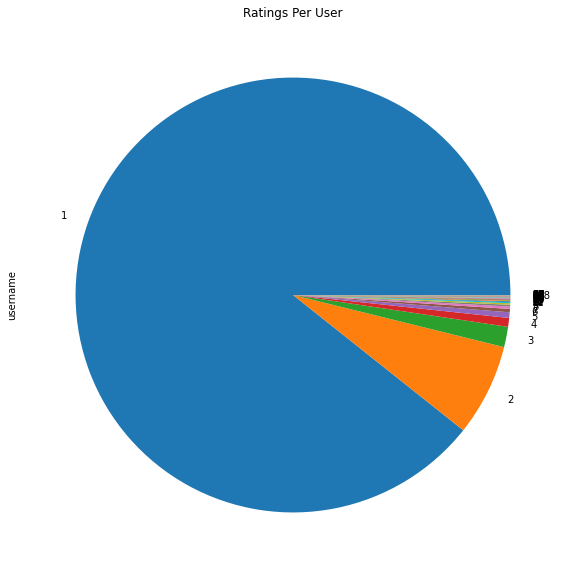

In [13]:
rating_perperson=reviews.username.value_counts()
#ratings 
print ("Total ratings : " + str(sum(rating_perperson)))
print ("Total users : " + str(len(rating_perperson)))
print("Users giving bulk ratings (more than 10) : " + str(sum(rating_perperson >10)))
bulk = rating_perperson[rating_perperson >10]
bulk_rating = sum(bulk)
print ("Bulk ratings : " + str(bulk_rating))
print ("Populations of bulk ratings : " + str(bulk_rating*100/sum(rating_perperson)))
print ("Populations of bulk users : " + str(sum(rating_perperson >10)*100/len(rating_perperson)))
rating_perperson.value_counts().plot(kind='pie',figsize=(10,10), title='Ratings Per User')

[<AxesSubplot:title={'center':'0'}> <AxesSubplot:title={'center':'1'}>]
count    3158.000000
mean        4.593414
std         0.732940
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64
count    31469.000000
mean         4.583686
std          0.735930
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64


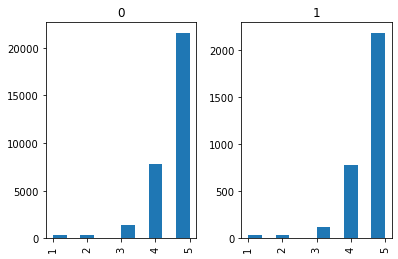

In [14]:
reviews['bulk']= reviews['username'].apply(lambda x : 1 if x in bulk.index else 0)
#gives us the category whether a rating is bulk or not
from matplotlib import pyplot
#series.hist(by=series)
print(reviews.rating.hist(by=reviews.bulk))
print(reviews[reviews.bulk==1].rating.describe())
print(reviews[reviews.bulk==0].rating.describe())

*** Rating distribution ***
5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: rating, dtype: int64


<AxesSubplot:title={'center':'Amazon customer ratings'}>

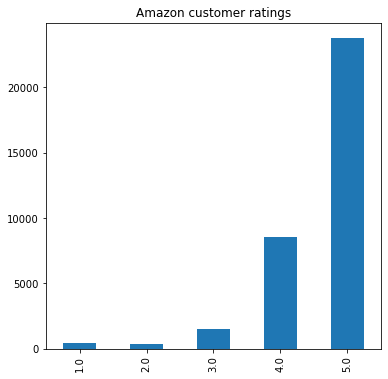

In [15]:
from matplotlib import pyplot
%matplotlib inline

star = reviews.rating.value_counts()
print("*** Rating distribution ***")
print(star)
star.sort_index(inplace=True)
star.plot(kind='bar',title='Amazon customer ratings',figsize=(6,6),style='Solarize_Light2')

In [16]:
NPS_score = round (100*((star.loc[5])-sum(star.loc[1:3]))/sum(star.loc[:]),2)
print (" NPS score of Amazon is : "  + str(NPS_score))

 NPS score of Amazon is : 61.99


In [17]:
kindle = reviews[reviews.name=='Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,']

In [18]:
kindle.isnull().sum()

name            0
asins           0
brand           0
categories      0
keys            0
manufacturer    0
date            0
dateAdded       0
dateSeen        0
doRecommend     0
numHelpful      0
rating          0
sourceURLs      0
text            0
title           0
username        0
bulk            0
dtype: int64

 NPS score of Kindle is : 77.08


<AxesSubplot:title={'center':'Amazon customer ratings'}>

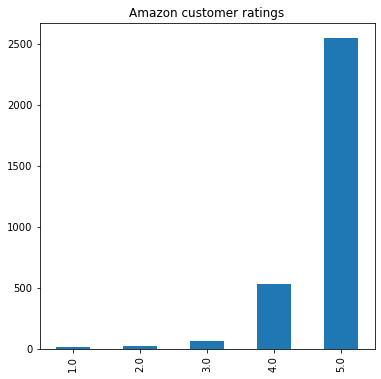

In [19]:
kindle_s = kindle.rating.value_counts()
kindle_s.sort_index(inplace=True)

Kindle_NPS_score = round (100*(kindle_s[5]-sum(kindle_s[1:3]))/sum(kindle_s),2)
print (" NPS score of Kindle is : "  + str(Kindle_NPS_score))
#better NPS than overall amazon
kindle_s.plot(kind='bar',title='Amazon customer ratings',figsize=(6,6),style='Solarize_Light2')

In [20]:
kindle.doRecommend.value_counts()

True     3111
False      65
Name: doRecommend, dtype: int64

array([<AxesSubplot:title={'center':'False'}>,
       <AxesSubplot:title={'center':'True'}>], dtype=object)

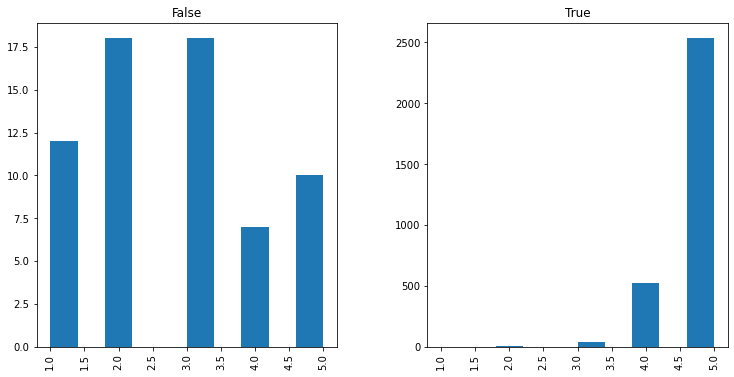

In [21]:
kindle.rating.hist(by=kindle.doRecommend,figsize=(12,6))

In [22]:
plus_kindle = kindle[kindle.doRecommend==True].rating.value_counts()
plus_kindle.sort_index(inplace=True)
recomm_NPS = round(100*(sum(plus_kindle[4:5])-sum(plus_kindle[1:2]))/sum(plus_kindle),2)
minus_kindle = kindle[kindle.doRecommend==False].rating.value_counts()
minus_kindle.sort_index(inplace=True)
notrecomm_NPS = round(100*(sum(minus_kindle[4:5])-sum(minus_kindle[1:2]))/sum(minus_kindle),2)
print("Those who recommend amazon kindle generate high NPS score of " + str(recomm_NPS))
print("Those who DO NOT recommend kindle produce a NPS score of " + str(notrecomm_NPS))
print(" ~ pretty much correct definition of NPS score")

Those who recommend amazon kindle generate high NPS score of 98.23
Those who DO NOT recommend kindle produce a NPS score of -20.0
 ~ pretty much correct definition of NPS score


In [23]:
comments = pd.concat([kindle['text']+". "+ kindle['title'],kindle['rating'],kindle['doRecommend']],axis=1)
comments.columns=['text','rating','recommend']

In [24]:
#cleaning text
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk

cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    #sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

senti["Summary_Clean"] = senti["text"].apply(cleanup)
check["Summary_Clean"] = check["text"].apply(cleanup)

C:\Users\KANIMO~1\AppData\Local\Temp/ipykernel_18688/687055249.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti["Summary_Clean"] = senti["text"].apply(cleanup)
C:\Users\KANIMO~1\AppData\Local\Temp/ipykernel_18688/687055249.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["Summary_Clean"] = check["text"].apply(cleanup)


In [25]:
#Splitting Train and Test Data
split = senti[["Summary_Clean" , "senti"]]
train=split.sample(frac=0.8,random_state=200)
test=split.drop(train.index)

In [26]:
#Feature Extracter 
def word_feats(words):
    features = {}
    for word in words:
        features [word] = True
    return features

In [27]:
train["words"] = train["Summary_Clean"].str.lower().str.split()
test["words"] = test["Summary_Clean"].str.lower().str.split()
check["words"] = check["Summary_Clean"].str.lower().str.split()

train.index = range(train.shape[0])
test.index = range(test.shape[0])
check.index = range(check.shape[0])
prediction =  {} ## For storing results of different classifiers

train_naive = []
test_naive = []
check_naive = []

for i in range(train.shape[0]):
    train_naive = train_naive +[[word_feats(train["words"][i]) , train["senti"][i]]]
for i in range(test.shape[0]):
    test_naive = test_naive +[[word_feats(test["words"][i]) , test["senti"][i]]]
for i in range(check.shape[0]):
    check_naive = check_naive +[word_feats(check["words"][i])]


classifier = NaiveBayesClassifier.train(train_naive)
print("NLTK Naive bayes Accuracy : {}".format(nltk.classify.util.accuracy(classifier , test_naive)))
classifier.show_most_informative_features(5)

C:\Users\KANIMO~1\AppData\Local\Temp/ipykernel_18688/1233231043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["words"] = check["Summary_Clean"].str.lower().str.split()


NLTK Naive bayes Accuracy : 0.5897472924187726
Most Informative Features
                 deleted = True              neg : pos    =     51.3 : 1.0
                 warning = True              neg : pos    =     51.3 : 1.0
                    bent = True              neg : pos    =     42.0 : 1.0
                    nope = True              neg : pos    =     42.0 : 1.0
                  rotate = True              neg : pos    =     42.0 : 1.0


In [28]:
y =[]
only_words= [test_naive[i][0] for i in range(test.shape[0])]
for i in range(test.shape[0]):
    y = y + [classifier.classify(only_words[i] )]
prediction["Naive"]= np.asarray(y)

y1 = []
for i in range(check.shape[0]):
    y1 = y1 + [classifier.classify(check_naive[i] )]

check["Naive"] = y1

C:\Users\KANIMO~1\AppData\Local\Temp/ipykernel_18688/4099987593.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["Naive"] = y1


In [29]:
from wordcloud import STOPWORDS

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
stopwords = set(STOPWORDS)
stopwords.remove("not")

count_vect = CountVectorizer(min_df=2 ,stop_words=stopwords , ngram_range=(1,2))
tfidf_transformer = TfidfTransformer()

X_train_counts = count_vect.fit_transform(train["Summary_Clean"])        
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


X_new_counts = count_vect.transform(test["Summary_Clean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

checkcounts = count_vect.transform(check["Summary_Clean"])
checktfidf = tfidf_transformer.transform(checkcounts)

C:\Users\Kanimozhi\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [30]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB().fit(X_train_tfidf , train["senti"])
prediction['Multinomial'] = model1.predict_proba(X_test_tfidf)[:,1]
print("Multinomial Accuracy : {}".format(model1.score(X_test_tfidf , test["senti"])))

check["multi"] = model1.predict(checktfidf)# Predicting Sentiment for Check which was Null values for rating

Multinomial Accuracy : 0.9329963898916968


C:\Users\KANIMO~1\AppData\Local\Temp/ipykernel_18688/1324113322.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["multi"] = model1.predict(checktfidf)# Predicting Sentiment for Check which was Null values for rating


In [31]:
#Fitting Logistic Regression
from sklearn import linear_model
logreg = linear_model.LogisticRegression(solver='lbfgs' , C=1000)
logistic = logreg.fit(X_train_tfidf, train["senti"])
prediction['LogisticRegression'] = logreg.predict_proba(X_test_tfidf)[:,1]
print("Logistic Regression Accuracy : {}".format(logreg.score(X_test_tfidf , test["senti"])))

check["log"] = logreg.predict(checktfidf)# Predicting Sentiment for Check which was Null values for rating

Logistic Regression Accuracy : 0.9373285198555956


C:\Users\Kanimozhi\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\KANIMO~1\AppData\Local\Temp/ipykernel_18688/2836495687.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["log"] = logreg.predict(checktfidf)# Predicting Sentiment for Check which was Null values for rating


In [32]:
#Getting most occuring words in training dataset
words = count_vect.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(words, logistic.coef_[0])),
    columns = ['feature', 'coef'])
feature_coefs.sort_values(by="coef")

,feature,coef
42481,terrible,-20.642484
48056,will definitely,-19.902734
38807,slow,-19.424715
10647,done great,-19.165395
18450,great year,-18.497884
...,...,...
32876,probably wouldn,16.029572
28400,not disappointed,16.629196
30972,perfect,18.188530
17859,great,19.440405


In [33]:
import string
import nltk
from nltk import PorterStemmer
import re 

stopwords = nltk.corpus.stopwords.words('english')
ps = PorterStemmer()
wn = nltk.WordNetLemmatizer()


def clean_stem (sent): 
    temp1 ="".join(x for x in sent if x not in string.punctuation)
    temp2 = re.split('\W+',temp1.lower())
    temp3 = [ps.stem(x) for x in temp2 if x not in stopwords]
    return temp3

def clean_lemma (sent): 
    temp1 ="".join(x for x in sent if x not in string.punctuation)
    temp2 = re.split('\W+',temp1.lower())
    temp3 = [wn.lemmatize(x) for x in temp2 if x not in stopwords]
    return temp3

text="Hello this is, my happiest place. organize, organizes, and organizing in Happy world ! with happiness ..\
so much of happy!! "

print("Stemmed " + "-".join(clean_stem(text)))
print("Lemmatized " + "-".join(clean_lemma(text)))

Stemmed hello-happiest-place-organ-organ-organ-happi-world-happi-much-happi-
Lemmatized hello-happiest-place-organize-organizes-organizing-happy-world-happiness-much-happy-


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectstem = TfidfVectorizer(analyzer=clean_stem)
vectlemm = TfidfVectorizer(analyzer=clean_lemma)

textfeatures=vectstem.fit_transform(comments['text'])
print("Stemmed - " + str(len(vectstem.get_feature_names())))

vectlemm.fit_transform(comments['text'])
print("Lemmatized - " + str(len(vectlemm.get_feature_names())))

Stemmed - 3693
Lemmatized - 4547


In [35]:
print("Lemmatized - " + str(len(vectlemm.get_feature_names())))

Lemmatized - 4547


In [36]:
textmatrix = pd.DataFrame(textfeatures.toarray(),columns=vectstem.vocabulary_)
textmatrix.head(5)

,nice,littl,set,slow,wish,would,investig,jump,like,long,...,git,vovag,sinpl,purpl,write,optioni,blackveri,onesveri,reliab,glich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
sum_scores = pd.DataFrame(textmatrix.sum(),columns=['sum_scores_TFIDF'])
sum_scores.head(10)

,sum_scores_TFIDF
nice,4.242392
littl,0.338632
set,0.515145
slow,4.349600
wish,4.576738
would,3.383977
investig,0.990953
jump,0.179253
like,0.145790
long,0.381124


In [38]:
sum_scores.sort_values(by='sum_scores_TFIDF',ascending=True)[:5] 

,sum_scores_TFIDF
gripe,0.076083
grandkid,0.076083
old,0.076083
cow,0.076083
felt,0.076083


In [39]:
sum_scores.sort_values(by='sum_scores_TFIDF',ascending=False)[:5]

,sum_scores_TFIDF
fool,217.397630
summer,209.501804
matt,198.910788
lighter,181.218969
purs,147.851506


In [40]:
pd.set_option('display.max_colwidth', 0)
comments.head()

,text,rating,recommend
17214,Its a nice little set up but it's slow. I wish I would have investigated them a little more before just jumping in.. I like it but....,3.0,True
17215,As long as apps are downloaded before leaving WIFI they work great for road trips or hunting trips!. Great for road trips!,5.0,True
17216,Was a gift for our 8 year old daughter. Great for kids. Great for kids,5.0,True
17217,my grandkids love it. This is the 3 one we bought.. kids love it,5.0,True
17218,Great case ok tablet no Android play store. Weak micro usb port. It's isn't an straight out the box tablet. Had to install Android play store on it. And as far as the charging port goes I'm on my 3rd one but best buy are the best with their return policy.... Tablet not for kids,3.0,True


In [41]:
#Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

happy = "I am Happy. this is so awesome. I love life. I will be in heaven"
#when you find free food in university
print("happy " + str(sid.polarity_scores(text)))


sad = "i hate this. I am mad this is stupid. I will kill you"
#when your professor gives you a ZERO in assignment
print("sad " + str(sid.polarity_scores(sad)))

neut = "I will come. You should go. This is blue color"
#when you state facts and nothing else
print("dont care - " + str(sid.polarity_scores(neut)))

happy {'neg': 0.0, 'neu': 0.483, 'pos': 0.517, 'compound': 0.9522}
sad {'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'compound': -0.9432}
dont care - {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [42]:
# Feature 1 : Sentiment compound value
def sentiment(x):
    score = sid.polarity_scores(x)
    return score['compound']
    
#sentiment(happy)
comments['sentiment']= comments['text'].apply(lambda x : sentiment(x))

In [43]:
# Feature 2 : Length of string

comments['length'] = comments['text'].apply(lambda x : len(re.split('\W+',x)))
comments[comments['rating']==5].head(10)

# before we proceed - we need to convert all true >> 1 and false as 0
def convert(x):
    
    if x==True:
        return 1
    else :
        return 0
    
print(convert("False"))

comments['target_rec'] = comments['recommend'].apply(lambda x : convert(x))
comments.head(5)

0


,text,rating,recommend,sentiment,length,target_rec
17214,Its a nice little set up but it's slow. I wish I would have investigated them a little more before just jumping in.. I like it but....,3.0,True,0.8271,29,1
17215,As long as apps are downloaded before leaving WIFI they work great for road trips or hunting trips!. Great for road trips!,5.0,True,0.8684,23,1
17216,Was a gift for our 8 year old daughter. Great for kids. Great for kids,5.0,True,0.9022,15,1
17217,my grandkids love it. This is the 3 one we bought.. kids love it,5.0,True,0.8555,14,1
17218,Great case ok tablet no Android play store. Weak micro usb port. It's isn't an straight out the box tablet. Had to install Android play store on it. And as far as the charging port goes I'm on my 3rd one but best buy are the best with their return policy.... Tablet not for kids,3.0,True,0.9457,58,1


In [44]:
comments[comments['rating']==1].head(5)

,text,rating,recommend,sentiment,length,target_rec
17220,This product wouldn't turn on nor charge and then store couldn't locate another one for me.. Product Issues,1.0,False,0.0000,20,0
17423,"Would not take a charge, good thing i tried before wrapping it for Christmas.. Had to return this on Christmas eve day",1.0,False,-0.3412,22,0
17443,"I didon't care for this tablet, downloading apps outside of Amazon was really confusing.. Don't like...too hard to download other apps",1.0,False,-0.1611,24,0
17729,"I am really disappointed in this Kindle....I have had many kindles, but I wanted somwthing I thoughtnwould be simple. This kindle doesn't show all my books that are in my cloud..it doesn't matter that they aren't in my device but they should still show up in my cloud...I have to go to my amazon account and transfer the book I want to my device.. Great for someone who doesn't have alot of books",1.0,False,0.7809,80,0
17887,Paper white does not allow you do use books from the library as you cannot load apps. Only books from Amazon are available to read.. Unable to access library,1.0,False,0.0088,29,0


In [45]:
#Predicting Recommendation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

# need to reset index of the comments column to match with textfeatures
new_sentiment = comments.sentiment.reset_index()['sentiment']
new_length = comments.length.reset_index()['length']

x_features = pd.concat([new_sentiment,new_length,
                        pd.DataFrame(textfeatures.toarray(),
                        columns=vectstem.vocabulary_)],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_features,comments.target_rec,test_size=0.2)

rf = RandomForestClassifier(n_jobs=-1,n_estimators=50,max_depth=90)
rfmodel=rf.fit(x_train,y_train)

y_pred = rfmodel.predict(x_test)
sorted(zip(rfmodel.feature_importances_,x_train.columns),reverse=True)[0:10]

[(0.037144518722604894, 'sentiment'),
 (0.012449555612131008, 'cool'),
 (0.012080658854928783, 'rightfirst'),
 (0.01068876422697111, 'matt'),
 (0.010438589958182372, 'squeezi'),
 (0.010170630204589037, 'length'),
 (0.009134663474989963, 'liketoo'),
 (0.008767708821384028, 'summer'),
 (0.008158077323670195, 'huge'),
 (0.007917382850513001, 'rough')]

In [46]:
precision, recall, fscore , support = score(y_test,y_pred,average='binary')
print('Precision: {} / Recall :{} / Accuracy {} '.format(round(precision,3),
                                                         round(recall,3),
                                                         round((y_pred==y_test).sum()/len(y_test),3)))

Precision: 0.972 / Recall :1.0 / Accuracy 0.972 


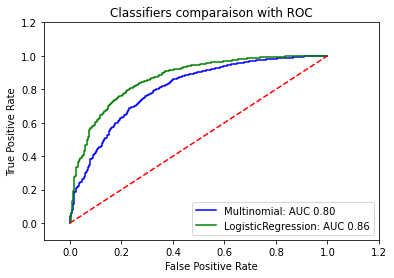

In [47]:
def formatt(x):
    if x == 'neg':
        return 0
    if x == 0:
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    if model not in 'Naive':
        false_positive_rate, true_positive_rate, thresholds = roc_curve(test["senti"].map(vfunc), predicted)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
        cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [48]:
test.senti = test.senti.replace(["pos" , "neg"] , [True , False] )

In [49]:
def test_sample(model, sample):
    sample_counts = count_vect.transform([sample])
    sample_tfidf = tfidf_transformer.transform(sample_counts)
    result = model.predict(sample_tfidf)[0]
    prob = model.predict_proba(sample_tfidf)[0]
    print("Sample estimated as %s: negative prob %f, positive prob %f" % (result.upper(), prob[0], prob[1]))

test_sample(logreg, "The product was good and easy to  use")
test_sample(logreg, "the whole experience was horrible and product is worst")
test_sample(logreg, "product is not good")
test_sample(logreg, "The product is awesome, but totally waste")

Sample estimated as POS: negative prob 0.000000, positive prob 1.000000
Sample estimated as NEG: negative prob 0.994523, positive prob 0.005477
Sample estimated as NEG: negative prob 0.982762, positive prob 0.017238
Sample estimated as POS: negative prob 0.004287, positive prob 0.995713


In [70]:
check.head(10)

,rating,text,title,username,Summary_Clean,words,Naive,multi,log
0,NaN,"The Kindle is my first e-ink reader. I own an iPad, an iPhone, and have owned a Windows-based phone in the past that I used as an ereader.My overall impression of the device is good.The good:I'd honestly rather read linear (read from page one to the end, one page at a time) fiction from it than a book, because I can't always get comfortable with a book. Hardcovers are sometimes a bit heavy, and paperbacks don't always lie open easily. The Kindle is incredibly light and thin. I can hold it in one hand easily. The page turn buttons are conveniently located. Page-turns aren't instant, but they're probably quicker than turning a physical page in a printed book (there are just a lot more page-turns unless you choose a small font). The contrast is better than other ereaders I've seen. There is zero eye strain in good light. My eyesight isn't the greatest and I like being able to increase the font size and read without glasses. I love being able to browse the Kindle store and read samples before deciding to purchase. The experimental browser is surprisingly usable, but isn't great. It is useful for browsing wikipedia and blogs. The biggest drawback to the browser is the awkward pointer navigation, using the 5-way pad. It syncs your furthest read page over the internet so you can pick up where you left off using your iPhone or iPad.The so-so:The kindle store could use more categories and sorting options. You can't sort by top rated, and there is no category for alternate histories, for example. Finding a very-specific type of fiction relies on keyword searches, which don't do a great job. The wifi sometimes doesn't connect before it times-out.Read more","Worth the money. Not perfect, but very very good for start to finish novels in good light",Jeffrey Stanley,the kindle is my first e ink reader i own an ipad an iphone and have owned a windows based phone in the past that i used as an ereader my overall impression of the device is good the good i d honestly rather read linear read from page one to the end one page at a time fiction from it than a book because i can t always get comfortable with a book hardcovers are sometimes a bit heavy and paperbacks don t always lie open easily the kindle is incredibly light and thin i can hold it in one hand easily the page turn buttons are conveniently located page turns aren t instant but they re probably quicker than turning a physical page in a printed book there are just a lot more page turns unless you choose a small font the contrast is better than other ereaders i ve seen there is zero eye strain in good light my eyesight isn t the greatest and i like being able to increase the font size and read without glasses i love being able to browse the kindle store and read samples before deciding to purchase the experimental browser is surprisingly usable but isn t great it is useful for browsing wikipedia and blogs the biggest drawback to the browser is the awkward pointer navigation using the way pad it syncs your furthest read page over the internet so you can pick up where you left off using your iphone or ipad the so so the kindle store could use more categories and sorting options you can t sort by top rated and there is no category for alternate histories for example finding a very specific type of fiction relies on keyword searches which don t do a great job the wifi sometimes doesn t connect before it times out read more,"[the, kindle, is, my, first, e, ink, reader, i, own, an, ipad, an, iphone, and, have, owned, a, windows, based, phone, in, the, past, that, i, used, as, an, ereader, my, overall, impression, of, the, device, is, good, the, good, i, d, honestly, rather, read, linear, read, from, page, one, to, the, end, one, page, at, a, time, fiction, from, it, than, a, book, because, i, can, t, always, get, comfortable, with, a, book, hardcovers, are, sometimes, a, bit, heavy, and, paperbacks, don, t, always, lie, ope